# CSE 5243 - Introduction to Data Mining
## Homework 4: Clustering
- Semester: Autumn 2024
- Instructor: Tom Bihari
- Section: Tuesday/Thursday 12:45PM
- Student Name: Mary Shas Anak Rowin Umpok
- Student Email: anakrowinumpok.1@osu.edu
- Student ID: 500611954

Template Version V2
***

***
# Section: Overview

### Objectives:

In this lab, you will perform clustering on three datasets.  Your will choose suitable clustering algorithms, evaluate them on the datasets, and compare their performance.

The objectives of this assignment are:
- Understand how to select and evaluate suitable off-the-shelf clustering algorithms based on the characteristics of a dataset and the outcomes you need.
- Understand how to tune and evaluate a clustering algorithm to achieve good performance.

### Datasets:

Three datasets are provided.  The first two are two-dimensional datasets.  They have different sizes (number of points) and shapes.  Each dataset contains columns X0, X1, and y.  The y column is the actual cluster number that was produced by the dataset generation algorithm.  Do not use it for the clustering algorithm.  It will be used to evaluate your clustering algorithm.  The files are:

- dataset1_Xydf.csv
- dataset2_Xydf.csv

The third dataset is the famous "penguin" dataset.  It is available here: https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris.  See the detailed guidance in the sections below.
- penguins_size.csv

### Approach:

This homework makes use of the Clustering Algorithms offered by the SciKitLearn Library.  Study the information at https://scikit-learn.org/stable/modules/clustering.html.  Follow the guidance in the individual sections below.

### Collaboration:

For this assignment, you must work as an individual. You may informally discuss ideas with classmates, to get advice on general Python usage, etc., but your work should be your own.  Please make use of Microsoft Teams for discussions with the intructor, TA, and classmates!

### What You Need to Turn In:

1. Code
- For this homework, the code is the Jupyter Notebook.  Use the provided Jupyter Notebook template, and fill in the appropriate information.
- This homework requires you to use clustering algorithms in the SciKitLearn library.  You also may use common Python libraries for I/O, data manipulation, data visualization, etc. (e.g., NumPy, Pandas, MatPlotLib,…).  You may not use library operations that perform, in effect, the entire “core” computations for this homework. (e.g., If you happen to find a single function on the web that does essentially *all* of a major portion of the homework, you may not use it.)  When in doubt, ask the grader or instructor.
- The code must be written by you, and any significant code snips you found on the Internet and used to understand how to do your coding for the core functionality must be attributed.  (You do not need to attribute basic functionality – matrix operations, IO, etc.)
- The code must be commented sufficiently to allow a reader to understand the algorithm without reading the actual Python, step by step.
- When in doubt, ask the grader or instructor.

2. Written Report
- For this homework, the report **is** the Jupyter Notebook.  The report should be well-written.  Please proof-read and remove spelling and grammar errors and typos.
- The report should discuss your analysis and observations. Key points and findings must be written in a style suitable for consumption by non-experts.  Present charts and graphs to support your observations. If you performed any data processing, cleaning, etc., please discuss it within the report.

### How to Turn In Your Work on Carmen:

**Please follow these instructions exactly** - it helps the grading process.  If you have questions, please ask.  Submit your Jupyter Notebook **.ipynb file** to Carmen - **do not ZIP or PDF it**. You do not need to include the input data.

### Grading:

0. Overall readability and organization of your report (5%) - Is it well organized and does the presentation flow in a logical manner; are there many grammar and spelling mistakes; do the charts/graphs relate to the text, etc.
1. Setup and Helper Functions (5%) - Are the Helper Functions (if any) and overall notebook setup correct, well structured, and suitable for use?
2. Evaluation of the K-Means Clustering Algorithm on Dataset1 (15%) – Is your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
3. Evaluation of the K-Means Clustering Algorithm on Dataset2 (15%) – Is your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
4. Evaluation of a Second Clustering Algorithm on Dataset2 (15%) – Is your choice of algorithm and your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
5. Comparison of the two Clustering Algorithms on Dataset2 (5%) - Is the comparison sound?  Did you choose a specific clustering algorithm as best and explain why?
6. Perform Clustering on Dataset3. Load and Preprocess the Data (5%) - Is your preprocessing sound?
7. Perform Clustering on Dataset3. Choose a Clustering Algorithm (5%) - Is your choice of algorithm sound?  Did you explain your choice?
8. Perform Clustering on Dataset3. Configure and Run the Algorithm (15%) - Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
9. Perform Clustering on Dataset3. Record Your Observations (10%) - Are your findings sound?  Are they relevant to the real world?
10. Conclusions (5%) – Did you document your overall insights? 

### Instructions and Helpful Hints:
- Consider putting all of your "discussion" text in markdown cells, not inline with code. That gives you more control over formatting. Markdown cheat sheet: https://www.markdownguide.org/cheat-sheet
- Consider creating re-usable functions for some common operations - you will be doing the same sorts of things multiple times below.
- Explain what you are doing, and why.  Explain what you found out or learned.
- *Make sure you run your entire workbook before handing it in, so the output cells are populated.*
- Follow the Section structure as much as possible - put your content where it is requested, so we can find your answers.
- If you have questions on expectations or need clarification or guidance, please ask.  Post to Teams if it is a general question, so everyone benefits.

### References and Acknowledgements:

1. https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster
2. https://scikit-learn.org/stable/modules/clustering.html
3. https://docs.python.org/3/library/time.html
4. https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linear_sum_assignment.html
5. https://gist.github.com/siolag161/dc6e42b64e1bde1f263b (using Hungarian Algorithm to match cluster labels - this is just an example)
6. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html (note that this is **mean** squared error)
***

***
# Section: Setup
- Add any needed imports, helper functions, etc., here.
***

In [756]:
# Import libraries
import pandas as pd
import numpy as np
from scipy.spatial import distance
from scipy.spatial.distance import cdist
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings('ignore')

#np.set_printoptions(threshold=np.inf)
np.set_printoptions(linewidth=120)

In [757]:
# HELPER FUNCTION - provided to you.  You may use this function or create your own visualizations.
def plot_clusters(title, X, y, size):
    import matplotlib.pyplot as plt
    
    # # This works, but may scale some datasets inappropriately.
    # # Probably should use 'equal' scaling in general, to be consistent with euclidean distance measures.
    # # See: https://www.pythonpool.com/matplotlib-aspect-ratio/
    # X0range = np.max(X[:,0]) - np.min(X[:,0])
    # X1range = np.max(X[:,1]) - np.min(X[:,1])
    # stretch = X0range / X1range
    stretch = 1.0
    
    plt.figure(figsize=(size * stretch, size))
    plt.title(title)
    plt.xlabel("X0") 
    plt.ylabel("X1")
    #plt.scatter(X[:, 0], X[:, 1], s = 40, c = y[:]) 
    unique_labels = np.unique(y)
    for label in unique_labels:
        plt.scatter(X[y == label, 0], X[y == label, 1], s=40, label=f"{label}")
    
    plt.legend(title="Clusters")  # Adds the legend with a title
    plt.show()
    plt.clf()

In [758]:
# HELPER FUNCTION - provided to you.  You may use this function or create your own.
def remap_cluster_labels(true_y, pred_y):
    # Rearrange the predicted cluster labels so they best match the true ones.
    # This function takes the true and predicted labels and returns the remapped predicted labels.
    # Situation: A clustering algorithm returns a set of cluster labels.  These labels typically will not be the same as the
    # true cluster labels (because the algorithm does not know anything about the true labels).  For example, the algorithm
    # may return (2,1,2,0,1,0,...) while the true labels are (0,2,0,1,2,1,...). Therefore it is necessary remap 2->0, 1->2,
    # and 0->1 when evaluating the quality of the algorithm.
    # Note: This code has not been tested for cases where there are negative cluster numbers (e.g., -1 for DbScan)
    #       or for cases where the true_y and pred_y matrices are of different lengths.
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linear_sum_assignment.html
    from scipy.optimize import linear_sum_assignment

    conf_mat = confusion_matrix(true_y, pred_y)  #SciKitLearn convention is rows are true labels, cols are predicted labels
    
    # Find the optimal remapping of labels, so the predicted labels best match the true labels.
    # col_index is the predicted label; row_index is the true label to change it to.
    
    # Negate the costs so maximizing the assignment minimizes the mismatches
    row_index, col_index = linear_sum_assignment(conf_mat.max()-conf_mat)

    # Remap the predicted labels.
    new_pred_y = np.zeros(len(pred_y))
    for r in range(0,len(row_index)):
        old = col_index[r]  # the predicted y's
        new = row_index[r]  # remap to the corresponding true y's
        new_pred_y[pred_y == old] = new

    return new_pred_y  # return the remapped labels

In [759]:
# # SUGGESTION - consider creating functions like these. (YOUR CODE MAY VARY!)
# def compute_single_sse(my_df):  # Columns are X0, X1
#     return my_SSE
#     return 111   # for example

# def compute_all_sse(my_df):  # Columns are X0, X1, y
#     return sum_WSS, overall_SSE-sum_WSS, overall_SSE    #Total (overall) SSE is the sum of BSS and WSS
#     return 111, 222, 333   # for example

In [760]:
def compute_WSS (X, labels):
    wss = 0.0
    unique_labels = np.unique(labels);

    for label in unique_labels:
        cluster_points = X[labels == label]
        centroid = cluster_points.mean(axis=0)
        distance = np.linalg.norm(cluster_points - centroid, axis=1) ** 2
        wss += np.sum(distance)

    return wss

In [761]:
def compute_BSS (X, labels):
    overall_centroid = X.mean(axis=0)
    bss = 0.0
    unique_labels = np.unique(labels)

    for label in unique_labels:
        cluster_points = X[labels == label]
        cluster_centroid = cluster_points.mean(axis=0)
        cluster_size = cluster_points.shape[0]
        distance = np.linalg.norm(cluster_centroid - overall_centroid) ** 2
        bss += cluster_size * distance

    return bss

In [762]:
# # SUGGESTION - consider creating a function to print the evaluation results of the clustering. (YOUR CODE MAY VARY!)
# def print_evaluation_results(title_string, show_true, show_pred, X, true_y, pred_y, running_time):
#     Print plots, WSS, BSS, total SSE, accuracy, confusion matrix, classification report, accuracy, running time, etc.

def print_evaluation_results(title_string, show_true, show_pred, X, true_y, pred_y, running_time):
    print(f"---{title_string}---\n")

    # plot true labels
    if show_true:
        plot_clusters("True Labels", X, true_y, 5)

    # plot predicted labels
    if show_pred:
        plot_clusters("Predicted Labels", X, pred_y, 5)

    if pred_y is not None:
        # calculate accuracy
        accuracy = accuracy_score(true_y, pred_y)
        print(f"Accuracy: {accuracy:.2%}\n")

        # calculate confusion matrix
        conf_matrix = confusion_matrix(true_y, pred_y)
        print("Confusion Matrix:")
        print(pd.DataFrame(conf_matrix),"\n")  # true values in rows, predicted in columns

        # create classification report
        class_report = classification_report(true_y, pred_y)
        print("Classification Report:", class_report)

    # show running time
    print(f"Running time: {running_time:.2f} seconds\n")


***
# Section: 1 - Evaluate the **K-Means** Algorithm on **Dataset1**
***

***
## Section: 1.1 - Calculate True Cluster Measures
- Given that you know the true clusters (from column y in the original data), compute the true within-cluster WSS (also called “SSE” in the slides), the between-cluster BSS, and the Total SSE (WSS+BSS).
- Print all of the evaluation results.
***

In [763]:
dataset1_df = pd.read_csv('dataset1_Xydf.csv')
X = dataset1_df[['X0','X1']].to_numpy()
true_y = dataset1_df['y'].to_numpy()

---DATASET1 TRUE CLUSTER MEASURES:---



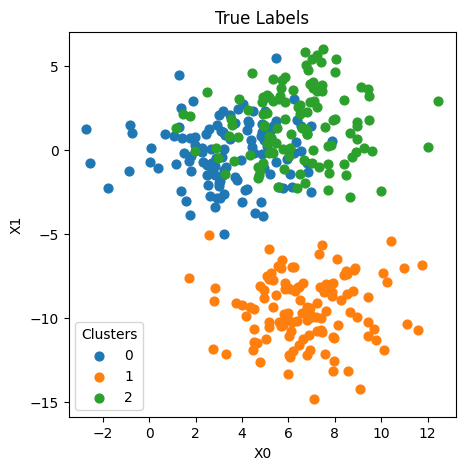

Running time: 0.00 seconds

WSS (Within-cluster Sum of Squares): 2768.15
BSS (Between-cluster Sum of Squares): 8943.73
Total SSE (Sum of Squared Errors): 11711.89



<Figure size 640x480 with 0 Axes>

In [764]:
# plot_clusters("Dataset 1", X, true_y, 5)  #temporary hack for example
print_evaluation_results("DATASET1 TRUE CLUSTER MEASURES:", True, False, X, true_y, None, 0.0)

# calculate WSS (Within-Cluster Sum of Squares)
wss = compute_WSS(X, true_y)
print(f"WSS (Within-cluster Sum of Squares): {wss:.2f}")

# calculate BSS (Between-Cluster Sum of Squares)
bss = compute_BSS(X, true_y)
print(f"BSS (Between-cluster Sum of Squares): {bss:.2f}")

# calculate SSE (Sum of Squared Errors)
sse = wss + bss
print(f"Total SSE (Sum of Squared Errors): {sse:.2f}\n")

***
## Section: 1.2 - Configure and Run the SciKitLearn K-Means Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for K=2, 3, 4.
- For each run:
  - Compute the WSS, BSS, and Total SSE (WSS+BSS).
  - Create a scatterplot of your clustering.
    - To assist in comparison, consider creating two adjacent scatterplots (true vs predicted), or overlaying the true and predicted clusterings on one scatterplot.
  - Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report). - Explain all configuration parameter values you chose, and why you chose them.
Note that you may need to "match up" the true and assigned cluster labels.  See the helper function above and the linear-sum-assignment and Hungarian algorithm references.
***

**WHAT I DID**

First, I created a list of KMeans with different number of clusters. Then I loop through the list, fits it to the dataset, compute the WSS, BSS and Total SSE, and create the true and predicted scatterplot of the clustering for easy comparison. In Section 1.1, the scatterplot shows that there are 3 true clusters. So, the number of clusters that we will use here are 2, 3, and 4 to see how accurate K-Means algorithm is in clustering the data.

In [765]:
np.random.seed(5)

estimators = [
    ("k_means_dataset1_2", KMeans(n_clusters=2)),
    ("k_means_dataset1_3", KMeans(n_clusters=3)),
    ("k_means_dataset1_4", KMeans(n_clusters=4))
]

---k_means_dataset1_2---



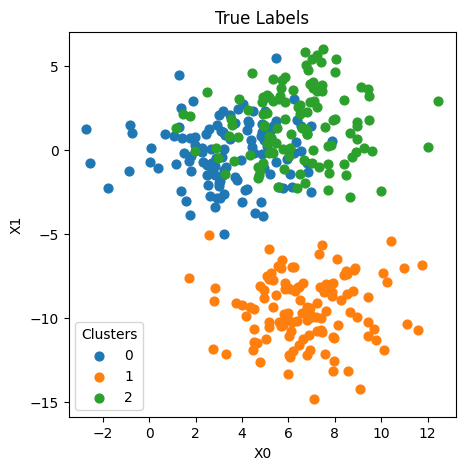

<Figure size 640x480 with 0 Axes>

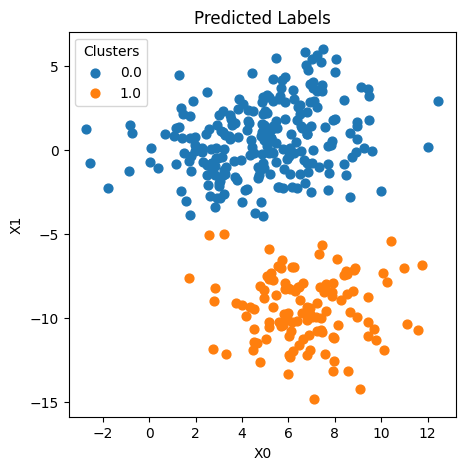

Accuracy: 66.57%

Confusion Matrix:
     0    1  2
0  116    1  0
1    0  117  0
2  116    0  0 

Classification Report:               precision    recall  f1-score   support

           0       0.50      0.99      0.66       117
           1       0.99      1.00      1.00       117
           2       0.00      0.00      0.00       116

    accuracy                           0.67       350
   macro avg       0.50      0.66      0.55       350
weighted avg       0.50      0.67      0.56       350

Running time: 0.00 seconds

WSS (Within-cluster Sum of Squares): 3415.38
BSS (Between-cluster Sum of Squares): 8296.50
Total SSE (Sum of Squared Errors): 11711.89

---k_means_dataset1_3---



<Figure size 640x480 with 0 Axes>

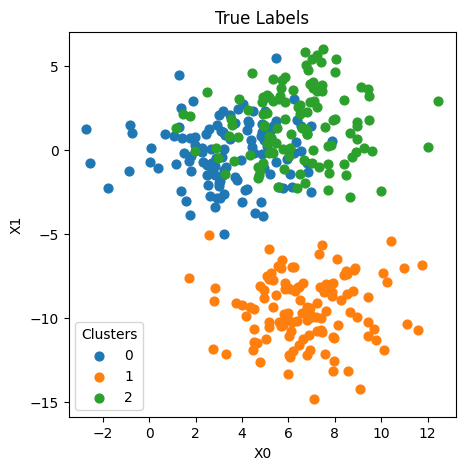

<Figure size 640x480 with 0 Axes>

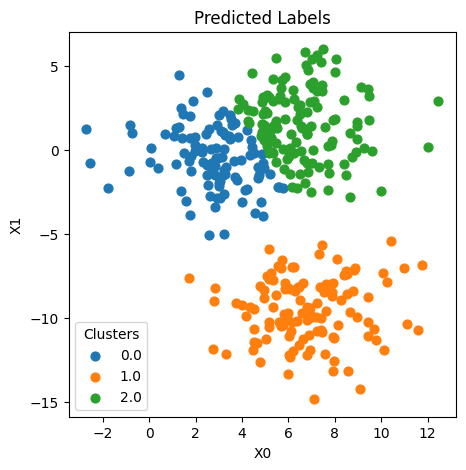

Accuracy: 84.29%

Confusion Matrix:
    0    1   2
0  83    0  34
1   1  116   0
2  20    0  96 

Classification Report:               precision    recall  f1-score   support

           0       0.80      0.71      0.75       117
           1       1.00      0.99      1.00       117
           2       0.74      0.83      0.78       116

    accuracy                           0.84       350
   macro avg       0.85      0.84      0.84       350
weighted avg       0.85      0.84      0.84       350

Running time: 0.00 seconds

WSS (Within-cluster Sum of Squares): 2320.88
BSS (Between-cluster Sum of Squares): 9391.01
Total SSE (Sum of Squared Errors): 11711.89

---k_means_dataset1_4---



<Figure size 640x480 with 0 Axes>

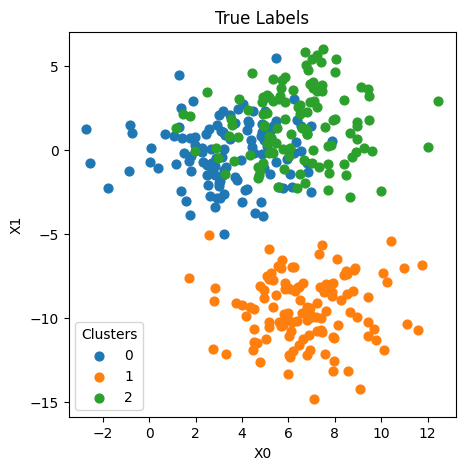

<Figure size 640x480 with 0 Axes>

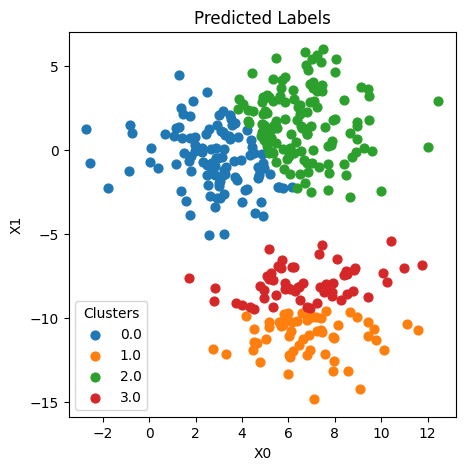

Accuracy: 68.00%

Confusion Matrix:
    0   1   2   3
0  84   0  33   0
1   1  58   0  58
2  20   0  96   0
3   0   0   0   0 

Classification Report:               precision    recall  f1-score   support

         0.0       0.80      0.72      0.76       117
         1.0       1.00      0.50      0.66       117
         2.0       0.74      0.83      0.78       116
         3.0       0.00      0.00      0.00         0

    accuracy                           0.68       350
   macro avg       0.64      0.51      0.55       350
weighted avg       0.85      0.68      0.73       350

Running time: 0.00 seconds

WSS (Within-cluster Sum of Squares): 2024.24
BSS (Between-cluster Sum of Squares): 9687.64
Total SSE (Sum of Squared Errors): 11711.89



<Figure size 640x480 with 0 Axes>

In [766]:
for name, est in estimators:
    start_time = time.time()

    est.fit(X)
    
    end_time = time.time()

    running_time = end_time - start_time

    pred_y = est.labels_

    new_pred_y = remap_cluster_labels(true_y, pred_y)
    
    print_evaluation_results(name, True, True, X, true_y, new_pred_y, running_time)

    # calculate WSS (Within-Cluster Sum of Squares)
    wss = compute_WSS(X, new_pred_y)
    print(f"WSS (Within-cluster Sum of Squares): {wss:.2f}")

    # calculate BSS (Between-Cluster Sum of Squares)
    bss = compute_BSS(X, new_pred_y)
    print(f"BSS (Between-cluster Sum of Squares): {bss:.2f}")

    # calculate SSE (Sum of Squared Errors)
    sse = wss + bss
    print(f"Total SSE (Sum of Squared Errors): {sse:.2f}\n")

***
## Section: 1.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (K value in particular), and why?
- Support this with statistics and/or graphs.
***

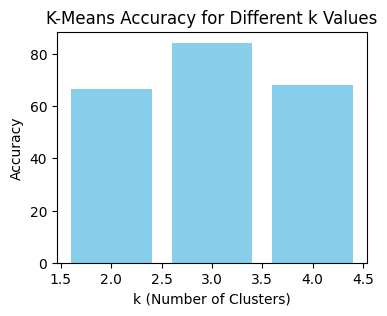

In [767]:
k_values = [2, 3, 4]
accuracy = [66.57, 84.29, 68.00]
plt.figure(figsize=(4, 3))
plt.bar(k_values, accuracy, color='skyblue')
plt.title('K-Means Accuracy for Different k Values')
plt.xlabel('k (Number of Clusters)')
plt.ylabel('Accuracy')
plt.show()

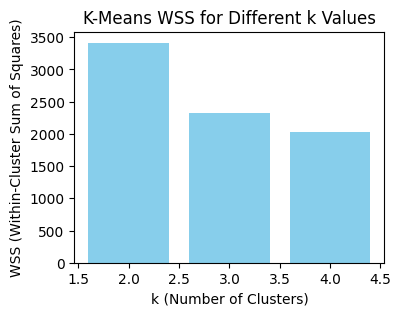

In [768]:
k_values = [2, 3, 4]
wss = [3415.38, 2320.88, 2024.24]
plt.figure(figsize=(4, 3))
plt.bar(k_values, wss, color='skyblue')
plt.title('K-Means WSS for Different k Values')
plt.xlabel('k (Number of Clusters)')
plt.ylabel('WSS (Within-Cluster Sum of Squares)')
plt.show()

**CONCLUSION**

I think we can safely conclude that K-Means with 3 clusters predicted the labels better if we compared it to the true cluster. The scatterplot shows that K-Means cluster the data almost similarly as the true cluster. However, we can clearly see that K-Means cluster the data in a more cleaner way compared to the true clusters. Looking at the true cluster scatterplot, data from two different clusters are overlapping with one another, meanwhile the predicted cluster for when K-Means = 3, has a better split between the clusters. I assume the centroid in the true cluster for dark blue and yellow cluster are close to one another, and this cause the data to overlap one another. 

If we don't know the true number of cluster, K-Means=2 cluster the data nicely too because we can observed that there could be two big cluster from the data points. However, the WSS is higher compared to the WSS when K-Means=3, and we would like to have a smaller value for WSS.

However, if we were to choose based on WSS, K-Means=4 has the lowest WSS, meaning the data points in each cluster are more closely related to each another, compared to when we have 2 and 3 clusters.

***
# Section: 2 - Evaluate the **K-Means** Algorithm on **Dataset2**
***

***
## Section: 2.1 - Calculate True Cluster Measures
- Given that you know the true clusters (from column y in the original data), compute the true within-cluster WSS (also called “SSE” in the slides), the between-cluster BSS, and the Total SSE (WSS+BSS).
***

In [769]:
dataset2_df = pd.read_csv('dataset2_Xydf.csv')
X = dataset2_df[['X0','X1']].to_numpy()
true_y = dataset2_df['y'].to_numpy()

---DATASET2 TRUE CLUSTER MEASURES:---



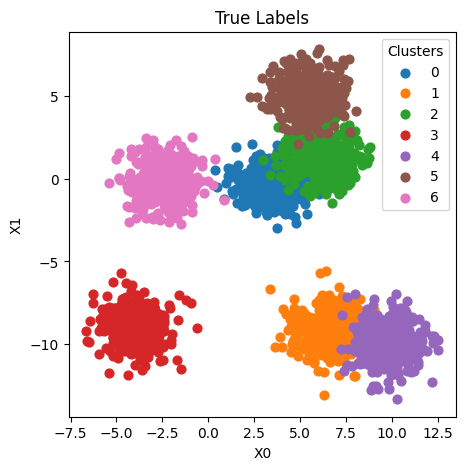

Running time: 0.00 seconds

WSS (Within-cluster Sum of Squares): 5162.07
BSS (Between-cluster Sum of Squares): 132888.13
Total SSE (Sum of Squared Errors): 138050.20



<Figure size 640x480 with 0 Axes>

In [770]:
# plot_clusters("Dataset 1", X, true_y, 5)  #temporary hack for example
print_evaluation_results("DATASET2 TRUE CLUSTER MEASURES:", True, False, X, true_y, None, 0.0)

# calculate WSS (Within-Cluster Sum of Squares)
wss = compute_WSS(X, true_y)
print(f"WSS (Within-cluster Sum of Squares): {wss:.2f}")

# calculate BSS (Between-Cluster Sum of Squares)
bss = compute_BSS(X, true_y)
print(f"BSS (Between-cluster Sum of Squares): {bss:.2f}")

# calculate SSE (Sum of Squared Errors)
sse = wss + bss
print(f"Total SSE (Sum of Squared Errors): {sse:.2f}\n")

***
## Section: 2.2 - Configure and Run the SciKitLearn K-Means Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for K=7, 8, 9.
- For each run:
  - Compute the WSS, BSS, and Total SSE (WSS+BSS).
  - Create a scatterplot of your clustering.
    - To assist in comparison, consider creating two adjacent scatterplots (true vs predicted), or overlaying the true and predicted clusterings on one scatterplot.
  - Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report). - Explain all configuration parameter values you chose, and why you chose them.
Note that you may need to "match up" the true and assigned cluster labels.  See the helper function above and the linear-sum-assignment and Hungarian algorithm references.
***

**WHAT I DID**

First, I created a list of KMeans with different number of clusters. Then I loop through the list, fits it to the dataset, compute the WSS, BSS and Total SSE, and create the true and predicted scatterplot of the clustering for easy comparison. In Section 1.1, the scatterplot shows that there are 7 true clusters. So, the number of clusters that we will use here are 7, 8, and 9 to see how accurate K-Means algorithm is in clustering the data.

In [771]:
np.random.seed(5)

estimators = [
    ("k_means_dataset2_7", KMeans(n_clusters=7)),
    ("k_means_dataset2_8", KMeans(n_clusters=8)),
    ("k_means_dataset2_9", KMeans(n_clusters=9))
]

---k_means_dataset2_7---



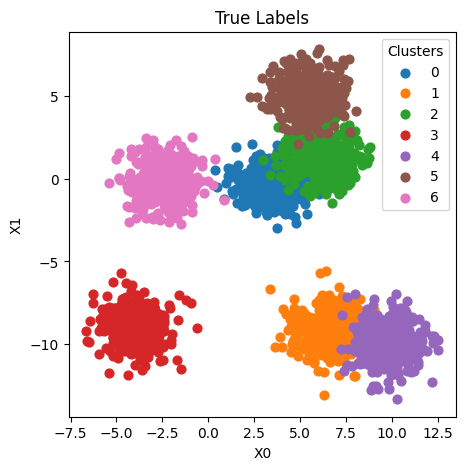

<Figure size 640x480 with 0 Axes>

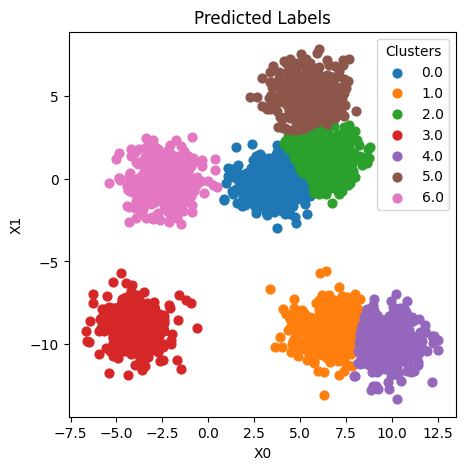

Accuracy: 95.88%

Confusion Matrix:
     0    1    2    3    4    5    6
0  335    0   21    0    0    0    2
1    0  341    0    0   16    0    0
2   31    0  317    0    0    9    0
3    0    0    0  357    0    0    0
4    0   16    0    0  341    0    0
5    0    0    7    0    0  350    0
6    1    0    0    0    0    0  356 

Classification Report:               precision    recall  f1-score   support

           0       0.91      0.94      0.92       358
           1       0.96      0.96      0.96       357
           2       0.92      0.89      0.90       357
           3       1.00      1.00      1.00       357
           4       0.96      0.96      0.96       357
           5       0.97      0.98      0.98       357
           6       0.99      1.00      1.00       357

    accuracy                           0.96      2500
   macro avg       0.96      0.96      0.96      2500
weighted avg       0.96      0.96      0.96      2500

Running time: 0.00 seconds

WSS (Within-cluste

<Figure size 640x480 with 0 Axes>

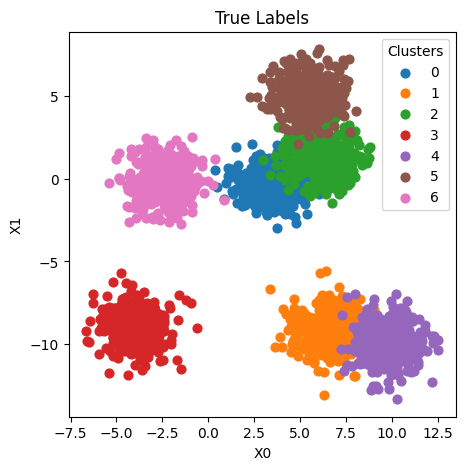

<Figure size 640x480 with 0 Axes>

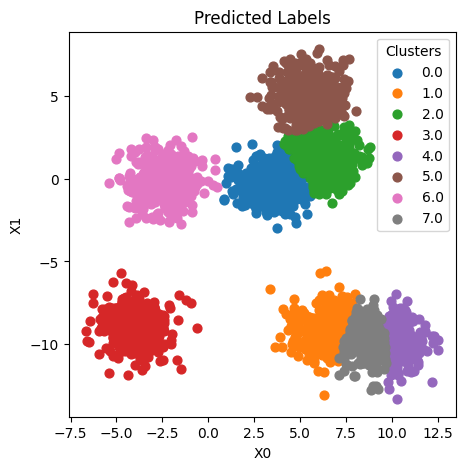

Accuracy: 88.96%

Confusion Matrix:
     0    1    2    3    4    5    6    7
0  335    0   21    0    0    0    2    0
1    0  302    0    0    1    0    0   54
2   31    0  317    0    0    9    0    0
3    0    0    0  357    0    0    0    0
4    0    4    0    0  207    0    0  146
5    0    0    7    0    0  350    0    0
6    1    0    0    0    0    0  356    0
7    0    0    0    0    0    0    0    0 

Classification Report:               precision    recall  f1-score   support

         0.0       0.91      0.94      0.92       358
         1.0       0.99      0.85      0.91       357
         2.0       0.92      0.89      0.90       357
         3.0       1.00      1.00      1.00       357
         4.0       1.00      0.58      0.73       357
         5.0       0.97      0.98      0.98       357
         6.0       0.99      1.00      1.00       357
         7.0       0.00      0.00      0.00         0

    accuracy                           0.89      2500
   macro avg       

<Figure size 640x480 with 0 Axes>

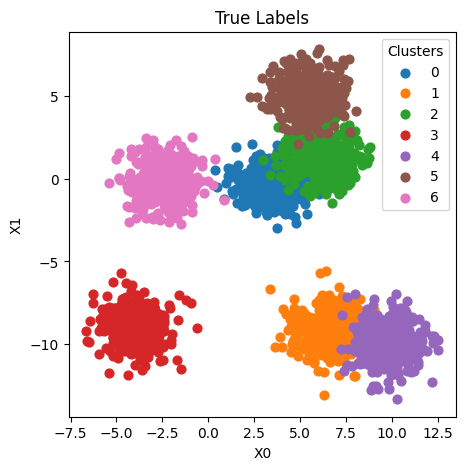

<Figure size 640x480 with 0 Axes>

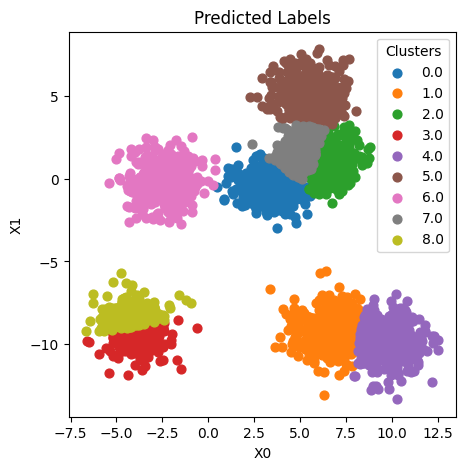

Accuracy: 83.72%

Confusion Matrix:
     0    1    2    3    4    5    6    7    8
0  299    0    7    0    0    0    1   51    0
1    0  341    0    0   16    0    0    0    0
2   13    0  233    0    0    9    0  102    0
3    0    0    0  182    0    0    0    0  175
4    0   16    0    0  341    0    0    0    0
5    0    0    3    0    0  341    0   13    0
6    1    0    0    0    0    0  356    0    0
7    0    0    0    0    0    0    0    0    0
8    0    0    0    0    0    0    0    0    0 

Classification Report:               precision    recall  f1-score   support

         0.0       0.96      0.84      0.89       358
         1.0       0.96      0.96      0.96       357
         2.0       0.96      0.65      0.78       357
         3.0       1.00      0.51      0.68       357
         4.0       0.96      0.96      0.96       357
         5.0       0.97      0.96      0.96       357
         6.0       1.00      1.00      1.00       357
         7.0       0.00      0.00   

<Figure size 640x480 with 0 Axes>

In [772]:
for name, est in estimators:
    start_time = time.time()

    est.fit(X)
    
    end_time = time.time()

    running_time = end_time - start_time
    
    pred_y = est.labels_

    new_pred_y = remap_cluster_labels(true_y, pred_y)
    
    print_evaluation_results(name, True, True, X, true_y, new_pred_y, running_time)

    # calculate WSS (Within-Cluster Sum of Squares)
    wss = compute_WSS(X, new_pred_y)
    print(f"WSS (Within-cluster Sum of Squares): {wss:.2f}")

    # calculate BSS (Between-Cluster Sum of Squares)
    bss = compute_BSS(X, new_pred_y)
    print(f"BSS (Between-cluster Sum of Squares): {bss:.2f}")

    # calculate SSE (Sum of Squared Errors)
    sse = wss + bss
    print(f"Total SSE (Sum of Squared Errors): {sse:.2f}\n")

***
## Section: 2.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (K value in particular), and why?
- Support this with statistics and/or graphs.
***

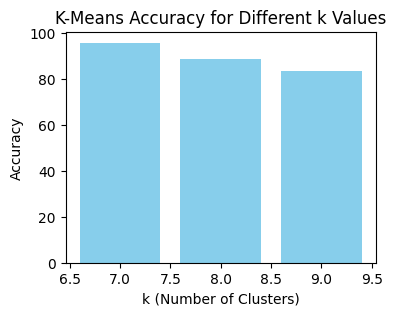

In [773]:
k_values = [7, 8, 9]
accuracy = [95.88, 88.96, 83.72]
plt.figure(figsize=(4, 3))
plt.bar(k_values, accuracy, color='skyblue')
plt.title('K-Means Accuracy for Different k Values')
plt.xlabel('k (Number of Clusters)')
plt.ylabel('Accuracy')
plt.show()

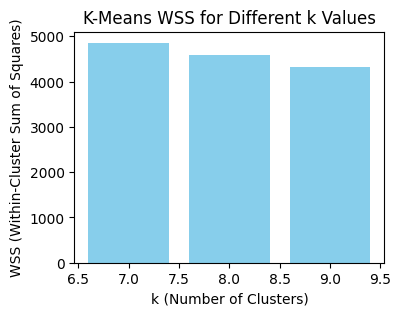

In [774]:
k_values = [7, 8, 9]
wss = [4857.74, 4582.20, 4329.04]
plt.figure(figsize=(4, 3))
plt.bar(k_values, wss, color='skyblue')
plt.title('K-Means WSS for Different k Values')
plt.xlabel('k (Number of Clusters)')
plt.ylabel('WSS (Within-Cluster Sum of Squares)')
plt.show()

**CONCLUSION**

When running the K-Means algorithm, and compare it to the true cluster, we can safely conclude that K-Means=7 cluster the label more accurately compare to when K-Means=8 and 9. When we observed the scatterplot for the predicted labels when K-Means=7, there are less data points overlapping between clusters.

However, if we want our data points to be more closely related to one another in a cluster, K-Means=9 is a good choice because it has the lowest value for WSS compared to when K-Means=7 and 8.

***
# Section: 3 - Evaluate a **Second** Clustering Algorithm on **Dataset2**
***

***
## Section: 3.1 - Choose a Clustering Algorithm from the SciKitLearn Library  
- Explain why you chose it.
- See the SciKitLearn references.
***

**CHOSEN CLUSTERING ALGORITHM**

I chose DBSCAN because it cluster the data based on density. Based on our findings in Section 2, the data in dataset2 can be seen to be divided into 3 big cluster. The data are either very close to one another or it is far from one another. So, I think density-based clustering would do well in this case. It is also good at handling noise and outliers which our dataset have a few.

***
## Section: 3.2 - Configure and Run the Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for (at least) two variations of the configuration settings (if any).
- For each run:
  - Compute the WSS, BSS, and Total SSE (WSS+BSS).
  - Create a scatterplot of your clustering.
    - To assist in comparison, consider creating two adjacent scatterplots (true vs predicted), or overlaying the true and predicted clusterings on one scatterplot.
  - Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report). - Explain all configuration parameter values you chose, and why you chose them.
Note that you may need to "match up" the true and assigned cluster labels.  See the helper function above and the linear-sum-assignment and Hungarian algorithm references.
***

**Parameter Values**

The two important parameter when using DBSCAN is eps which is the maximum distance between two samples for one to be considered as in the neighborhood of the other, and min_samples which is the number of samples in a neighborhood for a point to be considered as a core point.

In this section, I will test different values of eps and min_samples. After a few trial and error, I decided to start with   eps=0.6 and min_samples=10 because it produce a more acceptable result and scatterplot.

### FIRST VARIATION

Estimated number of clusters: 4
Estimated number of noise points: 96
Homogeneity: 0.630
Completeness: 0.886
V-measure: 0.737
Adjusted Rand Index: 0.524
Adjusted Mutual Information: 0.736
Silhouette Coefficient: 0.627


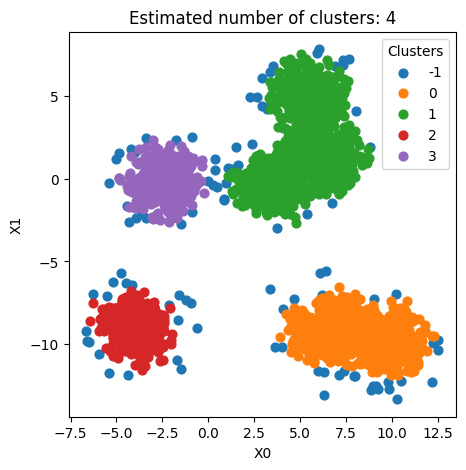

<Figure size 640x480 with 0 Axes>

In [775]:
start_time = time.time()
db = DBSCAN(eps=0.6, min_samples=10).fit(X)
end_time = time.time()
running_time = end_time - start_time
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters)
print("Estimated number of noise points: %d" % n_noise)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(true_y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(true_y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(true_y, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(true_y, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(true_y, labels)
)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

plot_clusters("Estimated number of clusters: %d" % n_clusters, X, labels, 5)

---k_means_dataset2_9---



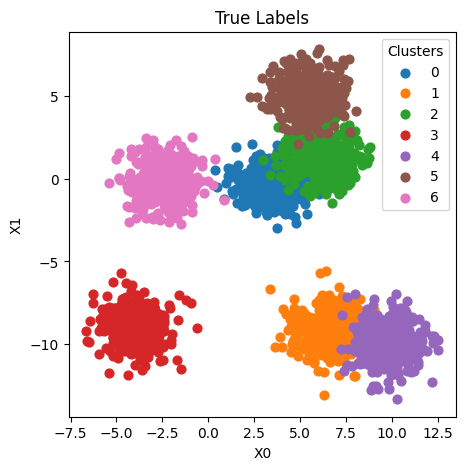

<Figure size 640x480 with 0 Axes>

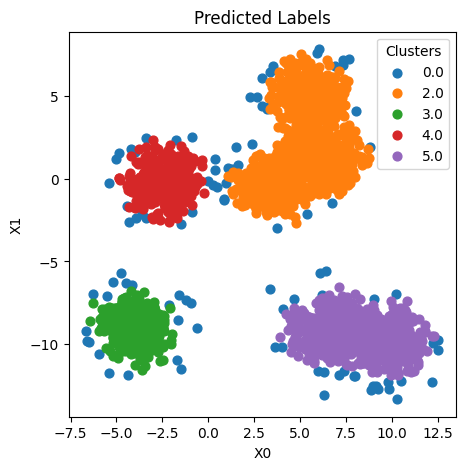

Accuracy: 28.12%

Confusion Matrix:
    0  1    2    3    4    5  6
0  11  0  347    0    0    0  0
1  14  0    0    0    0  343  0
2   2  0  355    0    0    0  0
3  20  0    0  337    0    0  0
4  15  0    0    0    0  342  0
5  15  0  342    0    0    0  0
6  19  0    0    0  338    0  0 

Classification Report:               precision    recall  f1-score   support

           0       0.11      0.03      0.05       358
           1       0.00      0.00      0.00       357
           2       0.34      0.99      0.51       357
           3       1.00      0.94      0.97       357
           4       0.00      0.00      0.00       357
           5       0.00      0.00      0.00       357
           6       0.00      0.00      0.00       357

    accuracy                           0.28      2500
   macro avg       0.21      0.28      0.22      2500
weighted avg       0.21      0.28      0.22      2500

Running time: 0.01 seconds

WSS (Within-cluster Sum of Squares): 19253.55
BSS (Between

<Figure size 640x480 with 0 Axes>

In [776]:
new_labels = remap_cluster_labels(true_y, labels)

print_evaluation_results(name, True, True, X, true_y, new_labels, running_time)

# calculate WSS (Within-Cluster Sum of Squares)
wss = compute_WSS(X, new_labels)
print(f"WSS (Within-cluster Sum of Squares): {wss:.2f}")

# calculate BSS (Between-Cluster Sum of Squares)
bss = compute_BSS(X, new_labels)
print(f"BSS (Between-cluster Sum of Squares): {bss:.2f}")

# calculate SSE (Sum of Squared Errors)
sse = wss + bss
print(f"Total SSE (Sum of Squared Errors): {sse:.2f}\n")

### SECOND VARIATION

Estimated number of clusters: 5
Estimated number of noise points: 338
Homogeneity: 0.569
Completeness: 0.729
V-measure: 0.639
Adjusted Rand Index: 0.458
Adjusted Mutual Information: 0.638
Silhouette Coefficient: 0.379


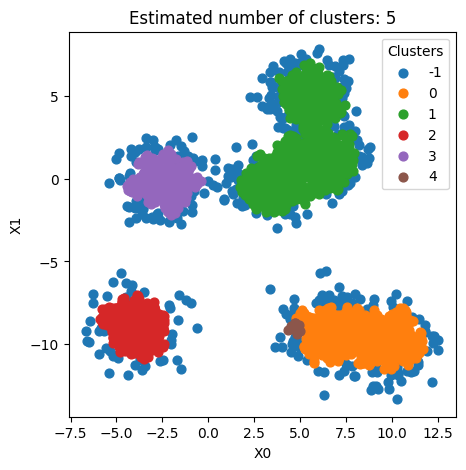

<Figure size 640x480 with 0 Axes>

In [777]:
start_time = time.time()
db = DBSCAN(eps=0.4, min_samples=10).fit(X)
end_time = time.time()
running_time = end_time - start_time
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters)
print("Estimated number of noise points: %d" % n_noise)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(true_y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(true_y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(true_y, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(true_y, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(true_y, labels)
)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

plot_clusters("Estimated number of clusters: %d" % n_clusters, X, labels, 5)

---k_means_dataset2_9---



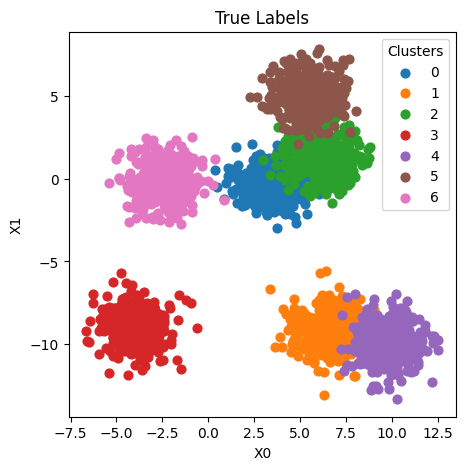

<Figure size 640x480 with 0 Axes>

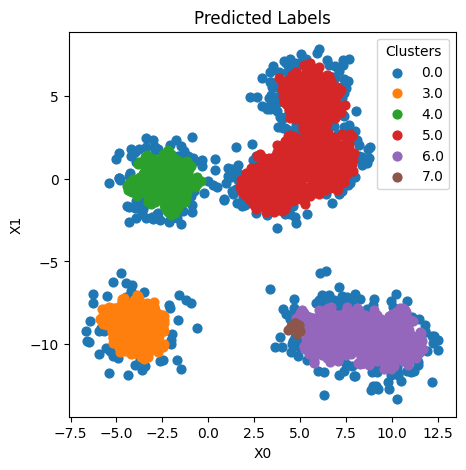

Accuracy: 25.52%

Confusion Matrix:
    0  1  2    3    4    5    6   7
0  35  0  0    0    0  323    0   0
1  48  0  0    0    0    0  297  12
2  30  0  0    0    0  327    0   0
3  44  0  0  313    0    0    0   0
4  48  0  0    0    0    0  309   0
5  67  0  0    0    0  290    0   0
6  66  0  0    0  291    0    0   0
7   0  0  0    0    0    0    0   0 

Classification Report:               precision    recall  f1-score   support

         0.0       0.10      0.10      0.10       358
         1.0       0.00      0.00      0.00       357
         2.0       0.00      0.00      0.00       357
         3.0       1.00      0.88      0.93       357
         4.0       0.00      0.00      0.00       357
         5.0       0.31      0.81      0.45       357
         6.0       0.00      0.00      0.00       357
         7.0       0.00      0.00      0.00         0

    accuracy                           0.26      2500
   macro avg       0.18      0.22      0.19      2500
weighted avg       

<Figure size 640x480 with 0 Axes>

In [778]:
new_labels = remap_cluster_labels(true_y, labels)

print_evaluation_results(name, True, True, X, true_y, new_labels, running_time)

# calculate WSS (Within-Cluster Sum of Squares)
wss = compute_WSS(X, new_labels)
print(f"WSS (Within-cluster Sum of Squares): {wss:.2f}")

# calculate BSS (Between-Cluster Sum of Squares)
bss = compute_BSS(X, new_labels)
print(f"BSS (Between-cluster Sum of Squares): {bss:.2f}")

# calculate SSE (Sum of Squared Errors)
sse = wss + bss
print(f"Total SSE (Sum of Squared Errors): {sse:.2f}\n")

### THIRD VARIATION

Estimated number of clusters: 4
Estimated number of noise points: 234
Homogeneity: 0.593
Completeness: 0.791
V-measure: 0.678
Adjusted Rand Index: 0.488
Adjusted Mutual Information: 0.677
Silhouette Coefficient: 0.564


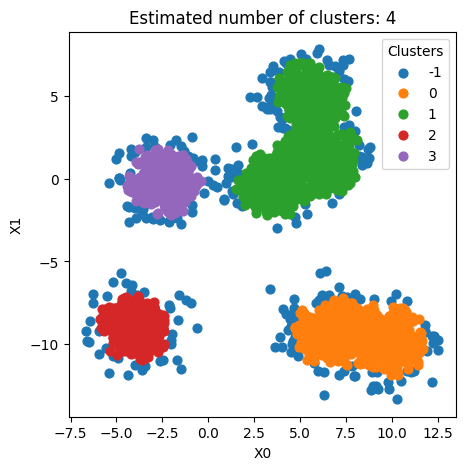

<Figure size 640x480 with 0 Axes>

In [779]:
start_time = time.time()
db = DBSCAN(eps=0.6, min_samples=20).fit(X)
end_time = time.time()
running_time = end_time - start_time
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters)
print("Estimated number of noise points: %d" % n_noise)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(true_y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(true_y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(true_y, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(true_y, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(true_y, labels)
)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

plot_clusters("Estimated number of clusters: %d" % n_clusters, X, labels, 5)

---k_means_dataset2_9---



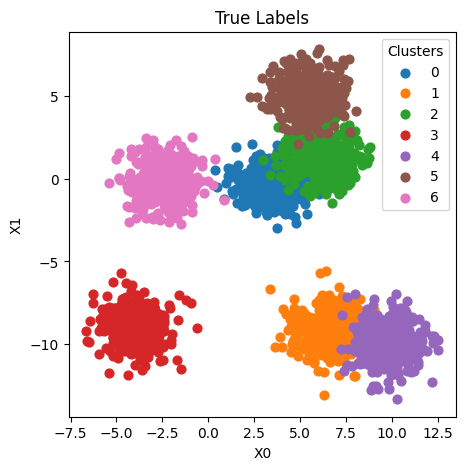

<Figure size 640x480 with 0 Axes>

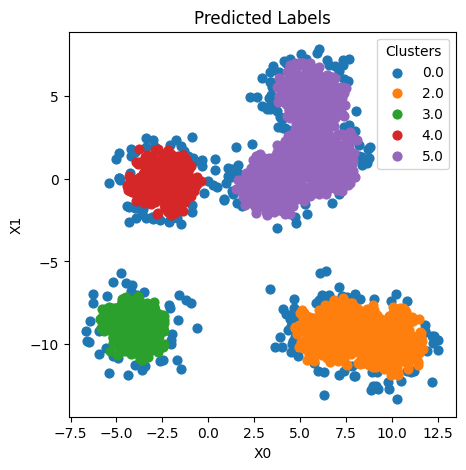

Accuracy: 26.32%

Confusion Matrix:
    0  1    2    3    4    5  6
0  22  0    0    0    0  336  0
1  40  0  317    0    0    0  0
2  16  0    0    0    0  341  0
3  38  0    0  319    0    0  0
4  31  0  326    0    0    0  0
5  40  0    0    0    0  317  0
6  47  0    0    0  310    0  0 

Classification Report:               precision    recall  f1-score   support

           0       0.09      0.06      0.07       358
           1       0.00      0.00      0.00       357
           2       0.00      0.00      0.00       357
           3       1.00      0.89      0.94       357
           4       0.00      0.00      0.00       357
           5       0.32      0.89      0.47       357
           6       0.00      0.00      0.00       357

    accuracy                           0.26      2500
   macro avg       0.20      0.26      0.21      2500
weighted avg       0.20      0.26      0.21      2500

Running time: 0.01 seconds

WSS (Within-cluster Sum of Squares): 26222.96
BSS (Between

<Figure size 640x480 with 0 Axes>

In [780]:
new_labels = remap_cluster_labels(true_y, labels)

print_evaluation_results(name, True, True, X, true_y, new_labels, running_time)

# calculate WSS (Within-Cluster Sum of Squares)
wss = compute_WSS(X, new_labels)
print(f"WSS (Within-cluster Sum of Squares): {wss:.2f}")

# calculate BSS (Between-Cluster Sum of Squares)
bss = compute_BSS(X, new_labels)
print(f"BSS (Between-cluster Sum of Squares): {bss:.2f}")

# calculate SSE (Sum of Squared Errors)
sse = wss + bss
print(f"Total SSE (Sum of Squared Errors): {sse:.2f}\n")

***
## Section: 3.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (configuration settings, if any), and why?
- Support this with statistics and/or graphs.
***

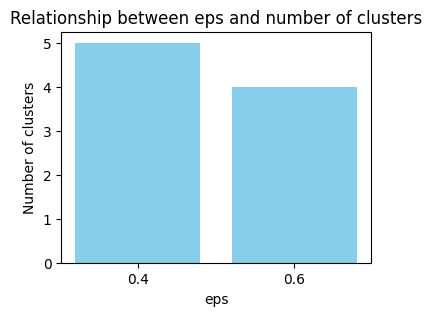

In [781]:
eps = [0.4, 0.6]
clusters = [5, 4]
plt.figure(figsize=(4, 3))
plt.bar([str(e) for e in eps], clusters, color='skyblue')
plt.title('Relationship between eps and number of clusters')
plt.xlabel('eps')
plt.ylabel('Number of clusters')
plt.show()

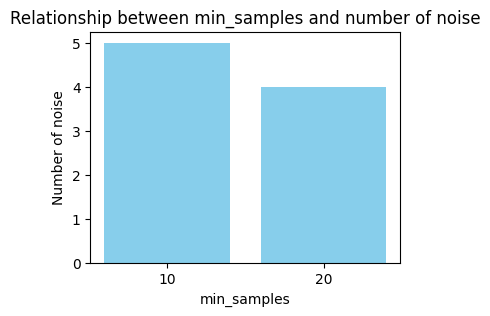

In [782]:
min_samples = [10, 20]
noise = [96, 234]
plt.figure(figsize=(4, 3))
plt.bar([str(m) for m in min_samples], clusters, color='skyblue')
plt.title('Relationship between min_samples and number of noise')
plt.xlabel('min_samples')
plt.ylabel('Number of noise')
plt.show()

**CONCLUSION**

Fixed min_samples=10:
When the eps is 0.6, DBSCAN cluster the data into 4 cluster, but when the eps is 0.4, there are 5 clusters. So, when the eps decrease, the number of cluster increase. So, if we want to have more cluster, it is better to choose a smaller eps.

Fixed eps=0.6:
When the min_samples is 10, the number of noise points is 96, but when the min_samples is 20, the number of noise points is 234. So, when min_samples increase, the number of noise points increase too. So, if we want less noise points, it is better to have lower number of min_samples.

In this case, I would choose DBSCAN with eps=0.6 and min_samples=10 which is the first variation. The first variation has the lowest WSS and the highest accuracy. It also has the lowest number of noise points, and it cluster the data in a more cleaner manner.

***
# Section: 4 - Comparison of the Two Clustering Algorithms on **Dataset2**
***

***
## Section: 4.1 - Compare Their Performance
- What was their relative performance (quality and timing), and their performance versus the true clustering?
- What characteristics of the data might impact the clustering algorithms' performance?
***

**Discussion:**

In terms of running time, K-Means algorithm is faster than DBSCAN.

In terms of the performance versus the true clustering, K-Means algorithm predict the labels more accurately and cluster the data points similarly as the true clustering. However, K-Means algorithm required user to set a specific number of cluster beforehand, meanwhile DBSCAN doesn't assume the number of cluster and cluster the data points based on density. So, K-Means would have a greater advantage in terms of performance.

When we observed the data in the scatterplot (ignoring the clustering and color), the data appears to form 4 distinct groupings, where the points are densely packed in specific areas with obvious separations between the groups. So, when we run DBSCAN algorithm on it, it outputs 4 clusters because it detect that there are 4 densely packed areas. However, depending on the value of eps, it could output more than 4 clusters or less. With K-Means algorithm, this characteristics doesn't really affect the performance because as mentioned before, the user set the number of cluster, and based on the centroids, it assigns the data based on their closeness to the centroids.

***
## Section: 4.2 - Choose the Better Clustering Algorithm
- Choose one of the two clustering algorithm as better and explain why.
***

**Discussion:**

In this case where we are comparing the predicted clustering to the true clustering, I choose K-Means because in terms of accuracy, it predict the labels more accurately compared to DBSCAN. The WSS value for K-Means are also significantly lower compared to DBSCAN. Since we knew beforehand how many true clustering there are in the dataset, it helps us to specify the numbers of clusters, so K-Means algorithm is the obvious choice.

***
# Section: 5 - Perform Clustering on **Dataset3**.  Here is the story:
Long ago, an inhabitant of a tropical island took their canoe into the ocean to do some fishing. A huge storm arose and some days later, the traveler landed on an ice-covered continent. The traveler named this continent Antarctica, after their Aunt Arctica. The continent was inhabited by strange creatures. Some of the creatures waddled around, swam, and made noises; the traveler named them Penguins. These creatures looked similar, but they had some differences. The traveler decided to do some analytics to see if there were patterns among the creatures. They collected the data provided here, and would like to determine if the penguins can be grouped into several different clusters.

**Pretend that they do not know how many clusters there are (if any), and do not have any actual species information (but you can use the species data for evaluating your clustering).**

Use similar processes to those you used for the first two datasets, choose appropriate tools, and answer the questions below.
***

***
## Section: 5.1 - Load and Preprocess the Data
- You shouldn't need to do much - perhaps fix some missing values or normalize the values.
***

**LOAD THE DATA**

In [783]:
penguins_df = pd.read_csv('penguins_size.csv')
# X = penguins_df[['island','culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']].to_numpy()

**CHECK FOR MISSING VALUES**

In [784]:
na_df = penguins_df[penguins_df.isna().any(axis=1)]
num_records_with_na = na_df.shape[0]
num_na_values = na_df.isna().sum().sum()
selected_attribute_names = ['island','culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']

print("Total records:", penguins_df.shape[0], "- Number of Records with NA", num_records_with_na, "- Number of NA values:", num_na_values)

na_df.head(10);

print("NA Values per Attribute:")
for att in selected_attribute_names:
    num_na = na_df[att].isna().sum()
    if num_na > 0:
        print(att, na_df[att].isna().sum())

Total records: 344 - Number of Records with NA 10 - Number of NA values: 18
NA Values per Attribute:
culmen_length_mm 2
culmen_depth_mm 2
flipper_length_mm 2
body_mass_g 2
sex 10


**REMOVE MISSING VALUES**

In [785]:
clean_penguins_df = penguins_df.copy()
clean_penguins_df.dropna(axis=0, how='any', inplace=True, subset=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex'])

**NORMALIZING THE VALUES**
- convert attributes sex, island and species to numeric values

In [786]:
clean_penguins_df['sex_numeric'] = clean_penguins_df['sex'].map({'MALE': 0, 'FEMALE': 1})
clean_penguins_df['island_numeric'] = clean_penguins_df['island'].map({'Torgersen': 0, 'Dream': 1, 'Biscoe': 2})
clean_penguins_df['species_numeric'] = clean_penguins_df['species'].map({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2})

In [787]:
norm_cols = clean_penguins_df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
scaler = StandardScaler()
scaled_norm_cols = scaler.fit_transform(norm_cols)

In [788]:
clean_penguins_df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,sex_numeric,island_numeric,species_numeric
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,0.0,0,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,1.0,0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,1.0,0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,1.0,0,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,0.0,0,0


***
## Section: 5.2 - Choose a Clustering Algorithm from the SciKitLearn Library  
- Explain why you chose it.
- See the SciKitLearn references.
***

**Discussion:**

In this case, I will choose DBSCAN algorithm because the number of clusters is unknown and DBSCAN doesn't need to know the number of clusters in advance. It is also good at handling noise points, so if there are any penguins with unique characteristics that doesn't belong to any group, DBSCAN will identify it as outliers.

***
## Section: 5.3 - Configure and Run the Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- From the set of attributes choose several pairs of "X" attributes (e.g., "flipper_length_mm, body_mass_g"), so you have 2-dimensional situations to process, as you did above). Run your algorithm for each of these pairs.
- For each run:
  - Compute the WSS, BSS, and Total SSE (WSS+BSS).
  - Create a scatterplot of your clustering.
    - To assist in comparison, consider creating two adjacent scatterplots (true vs predicted), or overlaying the true and predicted clusterings on one scatterplot.
  - Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report). - Explain all configuration parameter values you chose, and why you chose them.
Note that you may need to "match up" the true and assigned cluster labels.  See the helper function above and the linear-sum-assignment and Hungarian algorithm references.
***

### FIRST VARIATION
- First pair of X will be 'culmen_length_mm' and 'flipper_length_mm'

In [789]:
X = clean_penguins_df[['culmen_length_mm', 'flipper_length_mm']].to_numpy()
true_y = clean_penguins_df['species_numeric'].to_numpy()

Estimated number of clusters: 2
Estimated number of noise points: 20
Homogeneity: 0.522
Completeness: 0.643
V-measure: 0.576
Adjusted Rand Index: 0.589
Adjusted Mutual Information: 0.574


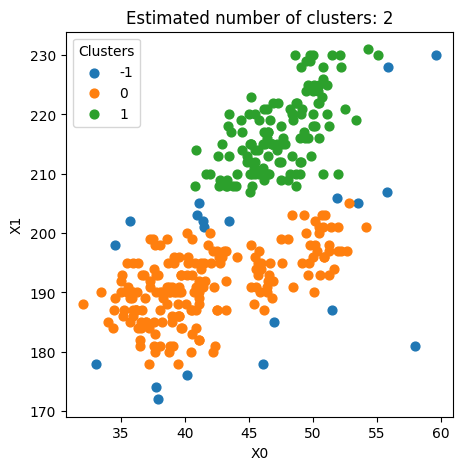

<Figure size 640x480 with 0 Axes>

In [790]:
start_time = time.time()
db = DBSCAN(eps=3.0, min_samples=10).fit(X)
end_time = time.time()
running_time = end_time - start_time
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters)
print("Estimated number of noise points: %d" % n_noise)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(true_y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(true_y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(true_y, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(true_y, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(true_y, labels)
)

plot_clusters("Estimated number of clusters: %d" % n_clusters, X, labels, 5)

---k_means_dataset2_9---



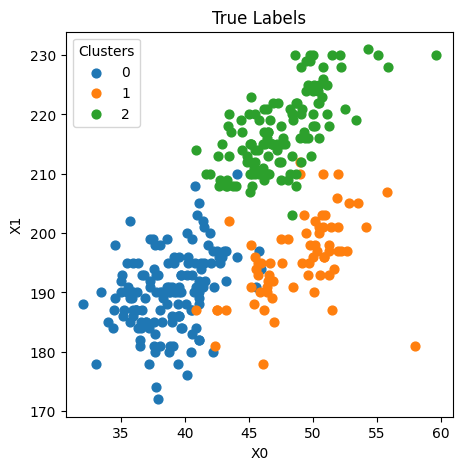

<Figure size 640x480 with 0 Axes>

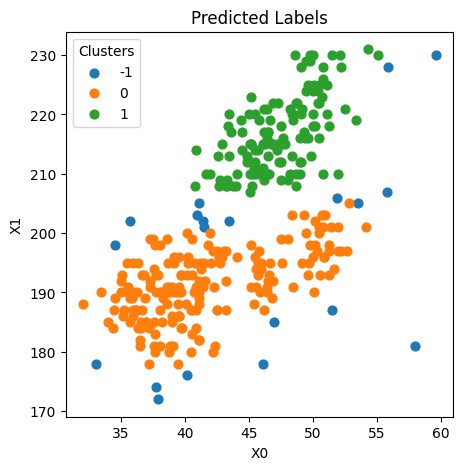

Accuracy: 41.32%

Confusion Matrix:
    0    1    2  3
0   0    0    0  0
1  10  134    2  0
2   8   56    4  0
3   2    1  117  0 

Classification Report:               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.70      0.92      0.80       146
           1       0.03      0.06      0.04        68
           2       0.00      0.00      0.00       120

    accuracy                           0.41       334
   macro avg       0.18      0.24      0.21       334
weighted avg       0.31      0.41      0.36       334

Running time: 0.00 seconds

WSS (Within-cluster Sum of Squares): 24005.18
BSS (Between-cluster Sum of Squares): 51398.90
Total SSE (Sum of Squared Errors): 75404.08



<Figure size 640x480 with 0 Axes>

In [791]:
new_labels = remap_cluster_labels(true_y, labels)

print_evaluation_results(name, True, True, X, true_y, labels, running_time)

# calculate WSS (Within-Cluster Sum of Squares)
wss = compute_WSS(X, labels)
print(f"WSS (Within-cluster Sum of Squares): {wss:.2f}")

# calculate BSS (Between-Cluster Sum of Squares)
bss = compute_BSS(X, labels)
print(f"BSS (Between-cluster Sum of Squares): {bss:.2f}")

# calculate SSE (Sum of Squared Errors)
sse = wss + bss
print(f"Total SSE (Sum of Squared Errors): {sse:.2f}\n")

### SECOND VARIATION
- Second pair of X will be 'culmen_length_mm' and 'culmen_depth_mm'

In [792]:
X = clean_penguins_df[['culmen_length_mm', 'culmen_depth_mm']].to_numpy()
true_y = clean_penguins_df['species_numeric'].to_numpy()

Estimated number of clusters: 3
Estimated number of noise points: 108
Homogeneity: 0.637
Completeness: 0.535
V-measure: 0.581
Adjusted Rand Index: 0.536
Adjusted Mutual Information: 0.578


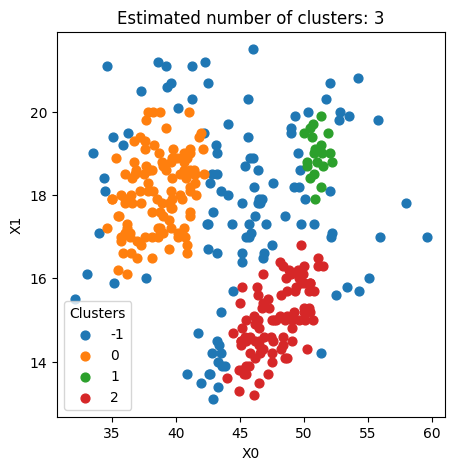

<Figure size 640x480 with 0 Axes>

In [793]:
start_time = time.time()
db = DBSCAN(eps=1.0, min_samples=15).fit(X)
end_time = time.time()
running_time = end_time - start_time
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters)
print("Estimated number of noise points: %d" % n_noise)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(true_y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(true_y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(true_y, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(true_y, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(true_y, labels)
)

plot_clusters("Estimated number of clusters: %d" % n_clusters, X, labels, 5)

---k_means_dataset2_9---



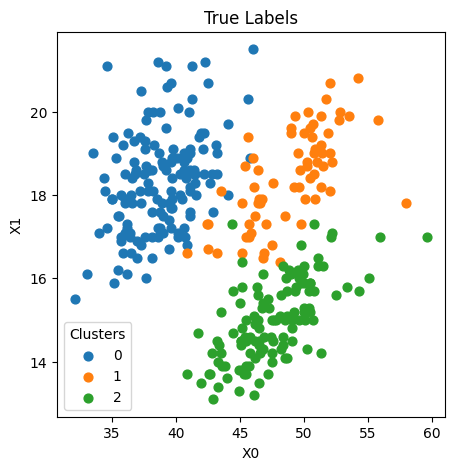

<Figure size 640x480 with 0 Axes>

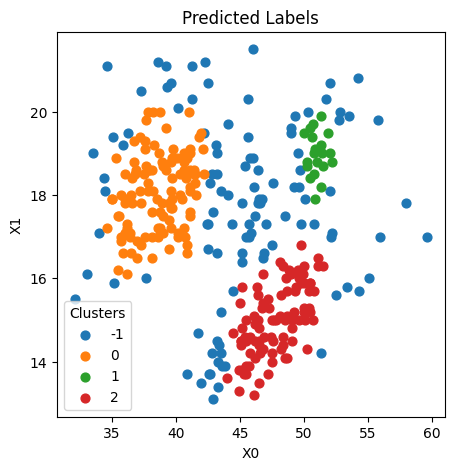

Accuracy: 67.07%

Confusion Matrix:
    0    1   2   3
0   0    0   0   0
1  34  112   0   0
2  46    1  20   1
3  28    0   0  92 

Classification Report:               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.99      0.77      0.86       146
           1       1.00      0.29      0.45        68
           2       0.99      0.77      0.86       120

    accuracy                           0.67       334
   macro avg       0.75      0.46      0.55       334
weighted avg       0.99      0.67      0.78       334

Running time: 0.00 seconds

WSS (Within-cluster Sum of Squares): 4929.14
BSS (Between-cluster Sum of Squares): 6289.61
Total SSE (Sum of Squared Errors): 11218.76



<Figure size 640x480 with 0 Axes>

In [794]:
new_labels = remap_cluster_labels(true_y, labels)

print_evaluation_results(name, True, True, X, true_y, labels, running_time)

# calculate WSS (Within-Cluster Sum of Squares)
wss = compute_WSS(X, labels)
print(f"WSS (Within-cluster Sum of Squares): {wss:.2f}")

# calculate BSS (Between-Cluster Sum of Squares)
bss = compute_BSS(X, labels)
print(f"BSS (Between-cluster Sum of Squares): {bss:.2f}")

# calculate SSE (Sum of Squared Errors)
sse = wss + bss
print(f"Total SSE (Sum of Squared Errors): {sse:.2f}\n")

### THIRD VARIATION
- Third pair of X will be 'flipper_length_mm' and 'body_mass_g'

In [795]:
X = clean_penguins_df[['flipper_length_mm', 'body_mass_g']].to_numpy()
true_y = clean_penguins_df['species_numeric'].to_numpy()

Estimated number of clusters: 1
Estimated number of noise points: 326
Homogeneity: 0.011
Completeness: 0.098
V-measure: 0.019
Adjusted Rand Index: -0.002
Adjusted Mutual Information: 0.013


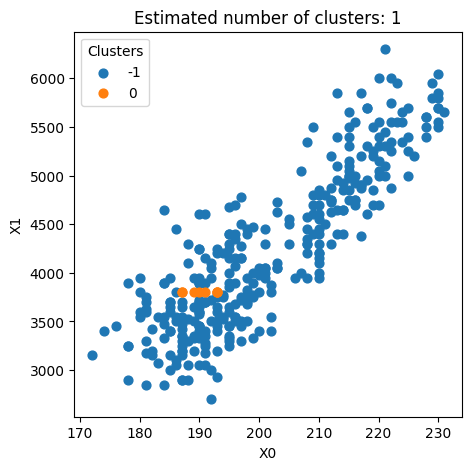

<Figure size 640x480 with 0 Axes>

In [796]:
start_time = time.time()
db = DBSCAN(eps=3.0, min_samples=8).fit(X)
end_time = time.time()
running_time = end_time - start_time
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters)
print("Estimated number of noise points: %d" % n_noise)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(true_y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(true_y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(true_y, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(true_y, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(true_y, labels)
)

plot_clusters("Estimated number of clusters: %d" % n_clusters, X, labels, 5)

---k_means_dataset2_9---



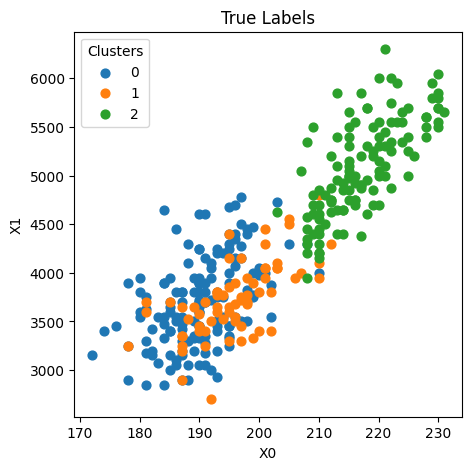

<Figure size 640x480 with 0 Axes>

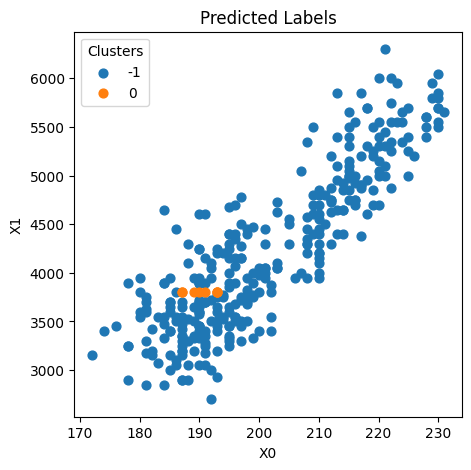

Accuracy: 1.80%

Confusion Matrix:
     0  1  2  3
0    0  0  0  0
1  140  6  0  0
2   66  2  0  0
3  120  0  0  0 

Classification Report:               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.75      0.04      0.08       146
           1       0.00      0.00      0.00        68
           2       0.00      0.00      0.00       120

    accuracy                           0.02       334
   macro avg       0.19      0.01      0.02       334
weighted avg       0.33      0.02      0.03       334

Running time: 0.00 seconds

WSS (Within-cluster Sum of Squares): 214397555.08
BSS (Between-cluster Sum of Squares): 1372397.76
Total SSE (Sum of Squared Errors): 215769952.84



<Figure size 640x480 with 0 Axes>

In [797]:
new_labels = remap_cluster_labels(true_y, labels)

print_evaluation_results(name, True, True, X, true_y, labels, running_time)

# calculate WSS (Within-Cluster Sum of Squares)
wss = compute_WSS(X, labels)
print(f"WSS (Within-cluster Sum of Squares): {wss:.2f}")

# calculate BSS (Between-Cluster Sum of Squares)
bss = compute_BSS(X, labels)
print(f"BSS (Between-cluster Sum of Squares): {bss:.2f}")

# calculate SSE (Sum of Squared Errors)
sse = wss + bss
print(f"Total SSE (Sum of Squared Errors): {sse:.2f}\n")

***
## Section: 5.4 - Record Your Observations
- What do you observe or conclude from these experiments?
  - Did you find any interesting patterns (that match up with the true species, or that are just "interesting").
  - How many species did you come up with?
- Which is your “preferred” clustering (configuration settings, if any), and why?
- Support this with statistics and/or graphs.
***

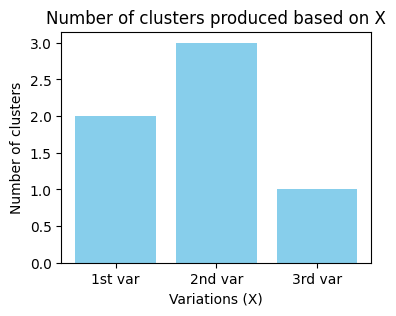

In [798]:
variations = ['1st var', '2nd var', '3rd var']
clusters = [2, 3, 1]
plt.figure(figsize=(4, 3))
plt.bar(variations, clusters, color='skyblue')
plt.title('Number of clusters produced based on X')
plt.xlabel('Variations (X)')
plt.ylabel('Number of clusters')
plt.show()

**Discussion:**

The first variation (culmen_length_mm and flipper_length_mm) and the second variation (culmen_length_mm and culmen_depth_mm) produce a good number of clusters. The scatterplot also shows a decent divide between the data points, but there are still many outliers in the second variation. So, I would assume that they are at least 2 clusters and at most 3 clusters without comparing it to the true clustering yet.

When comparing the three variations to the true clustering, only the second variation correctly cluster the data into 3 clusters. We could assume that culmen length and culmen depth are good attributes for clustering in this scenario.

It is difficult to choose what are my preferred configuration settings for DBSCAN because depending on how scattered the data points are or how densely packed the data points are, the value of eps and min_samples might change accordingly.

After running the DBSCAN algorithm on three different variations, what I can conclude is than DBSCAN algorithm might not be the best clustering algorithm for this situation. The data points are not densely packed in one area, which make it difficult to choose the right value of eps and min_samples. Looking at the true clustering scatterplot, some of the datapoints that belong to different cluster overlap with one another such as in the third variation true clustering. DBSCAN would not be able to accurately cluster the data if there are overlapping data points because it will just count it as the same group.

***
# Section: 6 - Conclusions
- Write a paragraph on what you discovered or learned from this homework.
***

**Conclusion:**

This homework has taught me the differences between 2 clustering algorithm that I used which are K-Means and DBSCAN. Both clustering algorithm have different use and one is not better than the other. K-Means groups data into a specified number of clusters. So, the most important parameters of K-Means is k. It uses centroids and adjust it repeatedly, then it assigns the data points based on their closeness to the centroids. Meanwhile, DBSCAN groups data based on density. It divides the points into 3 categories which are core points, border points, and noise points (outliers). The most important parameters of DBSCAN is eps and min_samples. For each data points, DBSCAN checks if it has at least min_samples neighbors within the eps radius. I found it challenging to choose the appropriate values for eps and min_samples. Most of the time, I use trial and error and see if it at least produce 2 clusters. Overall, this homework was fun to do, and I learned so much about K-Means and DBSCAN, and its differences.

***
### END-OF-SUBMISSION
***